Initialize Sentiment Analyzer

In [81]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pylab as plt
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/choiiatin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Updating Vader Lexicon with External Lexicon

In [2]:
import csv
import pandas as pd

# stock market lexicon
stock_lex = pd.read_csv('lexicon_data/stock_lex.csv')
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
    if v > 0:
         stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
         stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

# # # Loughran and McDonald
positive = []
with open('lexicon_data/lm_positive.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        positive.append(row[0].strip())
    
negative = []
with open('lexicon_data/lm_negative.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        entry = row[0].strip().split(" ")
        if len(entry) > 1:
            negative.extend(entry)
        else:
            negative.append(entry[0])

final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex

Scraping FB posts from Business Times

In [89]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}

for i in range(1,10):
    page = urlopen('https://www.businesstimes.com.sg/search/brexit%2Bdeal?page='+str(i)).read()
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            link_page = urlopen(url).read()
        except:
            url = url[:-2]
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=0)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)

02 Nov 2019 https://www.businesstimes.com.sg/government-economy/uk-government-defends-brexit-deal-after-trumps-trade-warning
01 Nov 2019 https://www.businesstimes.com.sg/government-economy/uk-brexit-accord-rules-out-trade-deal-with-us-trump
29 Oct 2019 https://www.businesstimes.com.sg/stocks/singapore-shares-add-04-on-sustained-brexit-trade-deal-hopes
22 Oct 2019 https://www.businesstimes.com.sg/government-economy/britains-labour-party-will-not-support-brexit-deal-or-timetable-corbyn
22 Oct 2019 https://www.businesstimes.com.sg/government-economy/pm-johnson-tells-lawmakers-pass-brexit-deal-and-britain-can-unite-again
21 Oct 2019 https://www.businesstimes.com.sg/government-economy/uk-speaker-rules-against-government-trying-to-get-another-vote-on-brexit-deal
21 Oct 2019 https://www.businesstimes.com.sg/government-economy/johnson-pushes-for-brexit-deal-vote-after-being-forced-to-seek-delay
21 Oct 2019 https://www.businesstimes.com.sg/banking-finance/pound-dips-as-brexit-saga-drags-but-hop

Populating the interactive namespace from numpy and matplotlib


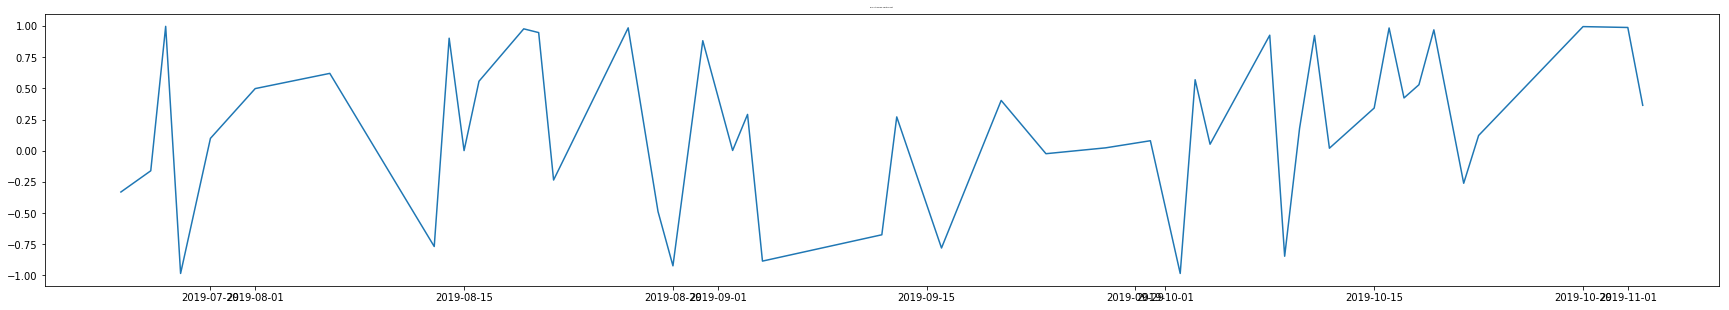

In [108]:
import matplotlib.pylab as plt
%matplotlib inline
%pylab inline
lists = sorted(date_sentiment.items()) # sorted by key, return a list of tuples
plt.figure(figsize=(30,5))
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.title("Brexit News Sentiment", fontsize=2)

plt.plot(x, y)
plt.show()

Algorithm simulation

Starting Portfolio Value: 100000.00
2019-08-12, Close, 7226.70
None
2019-08-13, Close, 7250.90
-0.768
2019-08-14, Close, 7147.90
0.902
2019-08-15, Close, 7067.00
0.001
2019-08-15, BUY CREATE, 7067.00
2019-08-16, BUY EXECUTED, Price: 7067.00, Cost: 35335.00, Comm 35.34
2019-08-16, Close, 7117.20
0.557
2019-08-19, Close, 7189.70
0.977
2019-08-20, Close, 7125.00
0.947
2019-08-21, Close, 7204.00
-0.235
2019-08-22, Close, 7128.20
-0.235
2019-08-23, Close, 7095.00
-0.235
2019-08-27, Close, 7089.60
-0.235
2019-08-28, Close, 7114.70
-0.488
2019-08-29, Close, 7184.30
-0.923
2019-08-30, Close, 7207.20
-0.923
2019-09-02, Close, 7281.90
0.002
2019-09-02, SELL CREATE, 7281.90
2019-09-03, SELL EXECUTED, Price: 7281.90, Cost: 35335.00, Comm 36.41
2019-09-03, OPERATION PROFIT, GROSS 1074.50, NET 1002.76
2019-09-03, Close, 7268.20
0.291
2019-09-04, Close, 7311.30
-0.885
2019-09-05, Close, 7271.20
-0.885
2019-09-06, Close, 7282.30
-0.885
2019-09-09, Close, 7235.80
-0.885
2019-09-10, Close, 7268.00
-0.88

<IPython.core.display.Javascript object>


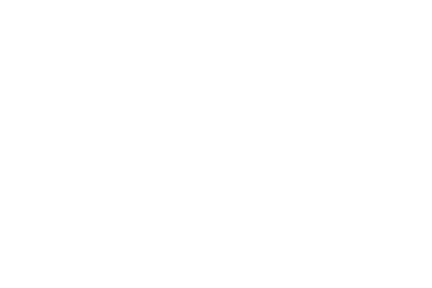

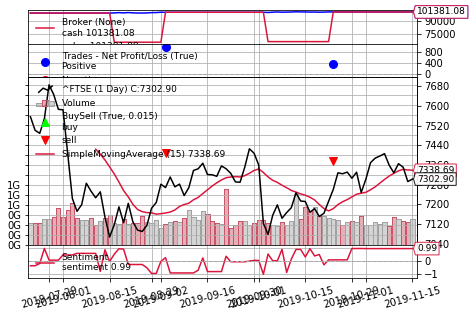

In [110]:
from __future__ import (absolute_import, division, print_function,
                            unicode_literals)

# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

import backtrader as bt
import backtrader.indicators as btind
import datetime
import os.path
import sys

class Sentiment(bt.Indicator):
    lines = ('sentiment',)
    plotinfo = dict(
        plotymargin=0.15,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])
    
    def next(self):
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ('period', 15),
        ('printlog', True),
    )

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function for this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # Keep track of pending orders
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return
        
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
            self.bar_executed = len(self)     
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        # Write down: no pending order
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
    
    ### Main Strat ###
    def next(self):
        # log closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])
        
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        
        # Check if an order is pending. if yes, we cannot send a 2nd one
        if self.order:
            return
        print(self.sentiment)
        # If not in the market and previous sentiment not none
        if not self.position and prev_sentiment:
            # buy if current close lower than sma AND sentiment decreased by 0.5
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= - 0.5:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy()
                
        # Already in the market and previous sentiment not none
        elif prev_sentiment:
            # sell if current close more than sma AND sentiment increased by 0.5
            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.25 :
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()

    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.period, self.broker.getvalue()), doprint=True)
        

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
    # Strategy
    cerebro.addstrategy(SentimentStrat)

    # Data Feed
    data = bt.feeds.YahooFinanceData(
        dataname = '^FTSE',
        fromdate = earliest_date,
        todate = datetime.datetime(2019,11,17),
        reverse = False
    )
    
    cerebro.adddata(data)

    cerebro.broker.setcash(100000.0)
    cerebro.addsizer(bt.sizers.FixedSize, stake=5)
    cerebro.broker.setcommission(commission=0.001)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    %matplotlib inline
    %pylab inline
    plt.figure(figsize=(50,5))
    cerebro.plot()
